Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Loading Main Dataset

In [2]:
df = pd.read_csv(r'C:\Users\pc\Documents\MACHINE LEARNING\Syntecxhub-Internship-Programme\Salary Prediction Project\datasets\Dataset09-Employee-salary-prediction.csv')
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [4]:
df.shape

(375, 6)

In [5]:
df.duplicated().sum()

np.int64(50)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 371
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  324 non-null    float64
 1   Gender               324 non-null    object 
 2   Education Level      324 non-null    object 
 3   Job Title            324 non-null    object 
 4   Years of Experience  324 non-null    float64
 5   Salary               324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [11]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [12]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Exploratory Data Analysis

Numerical Variables Distribution

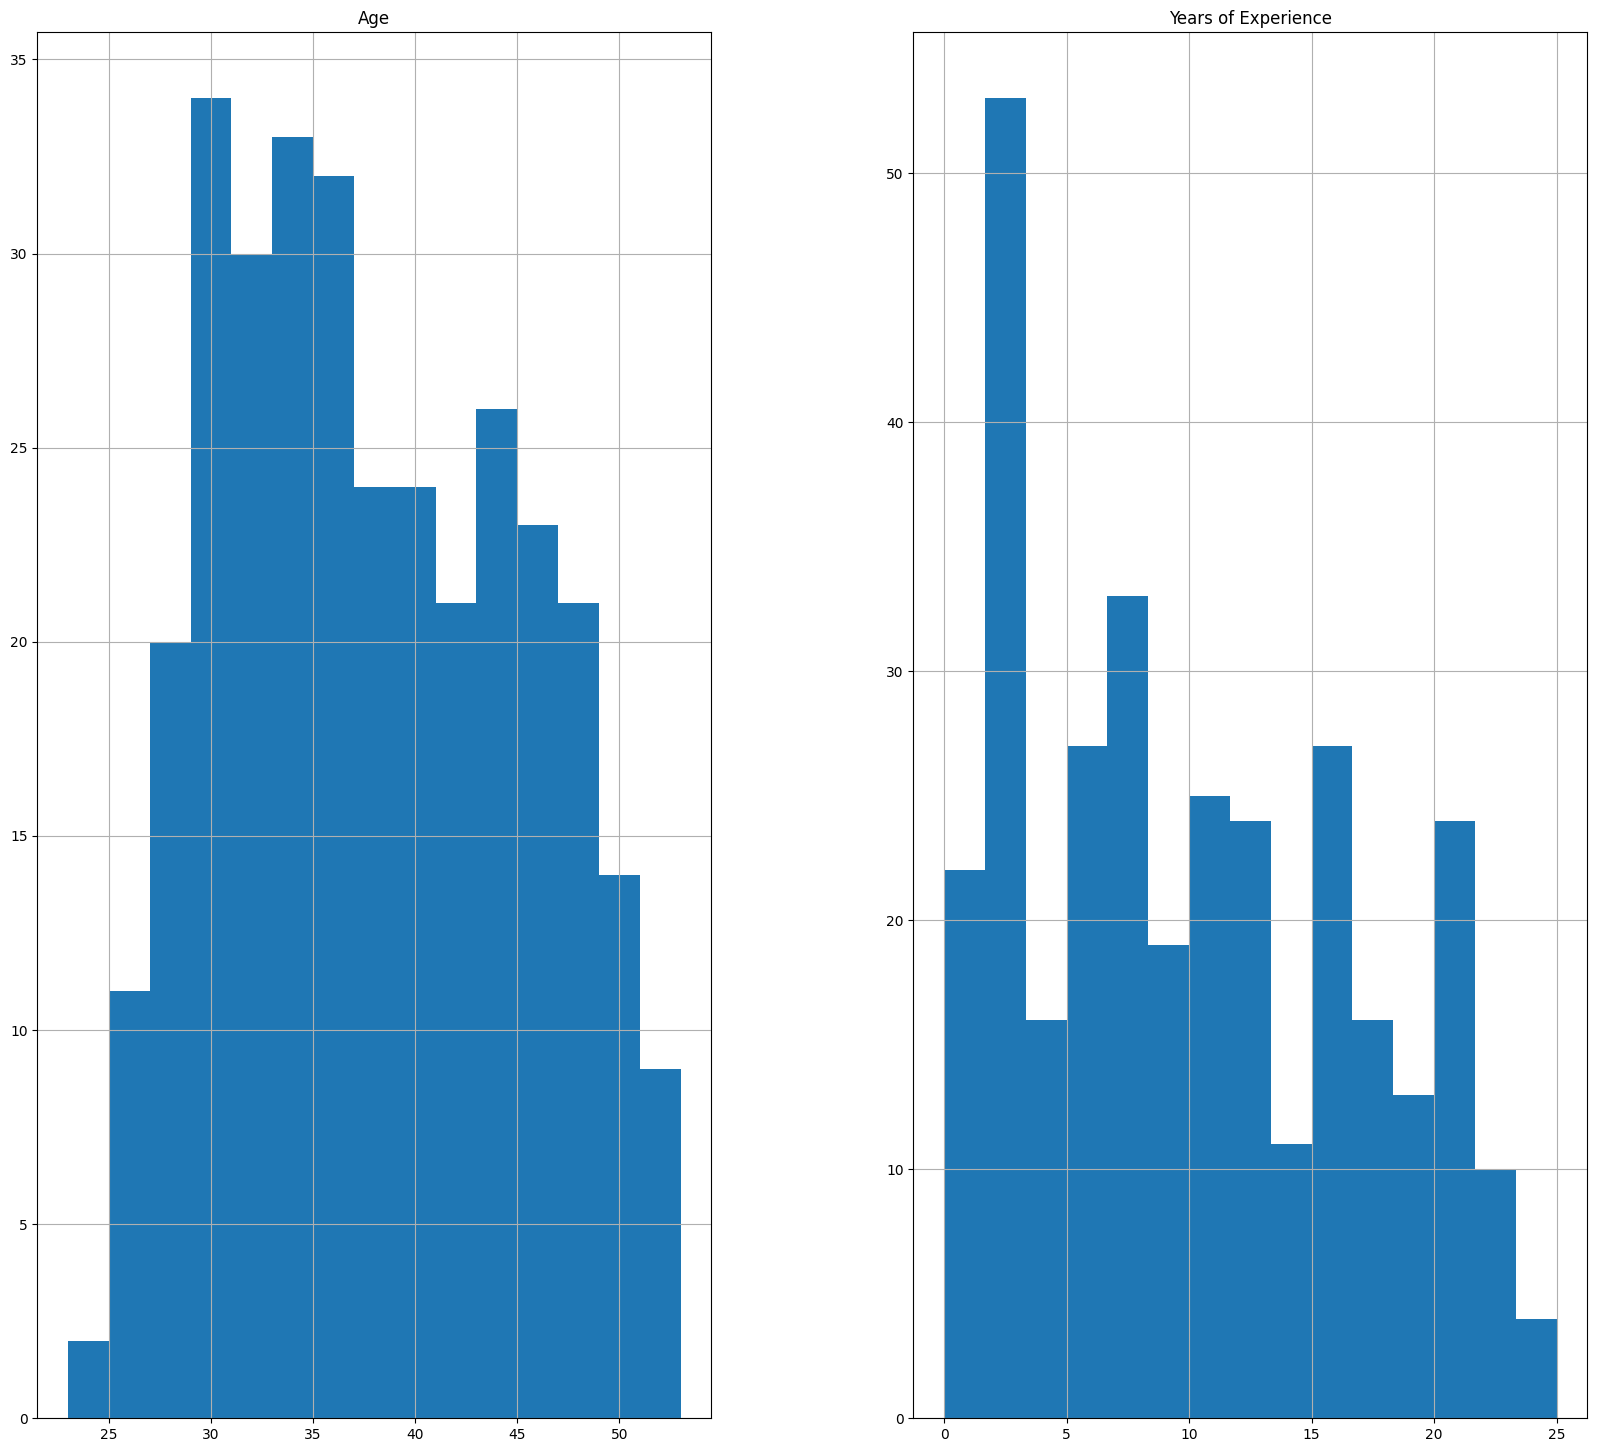

In [13]:
df_num = df._get_numeric_data().drop('Salary', axis=1)
df_num.hist(bins=15, figsize=(20,18))
plt.show()

Visualization of categorical variables

In [14]:
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

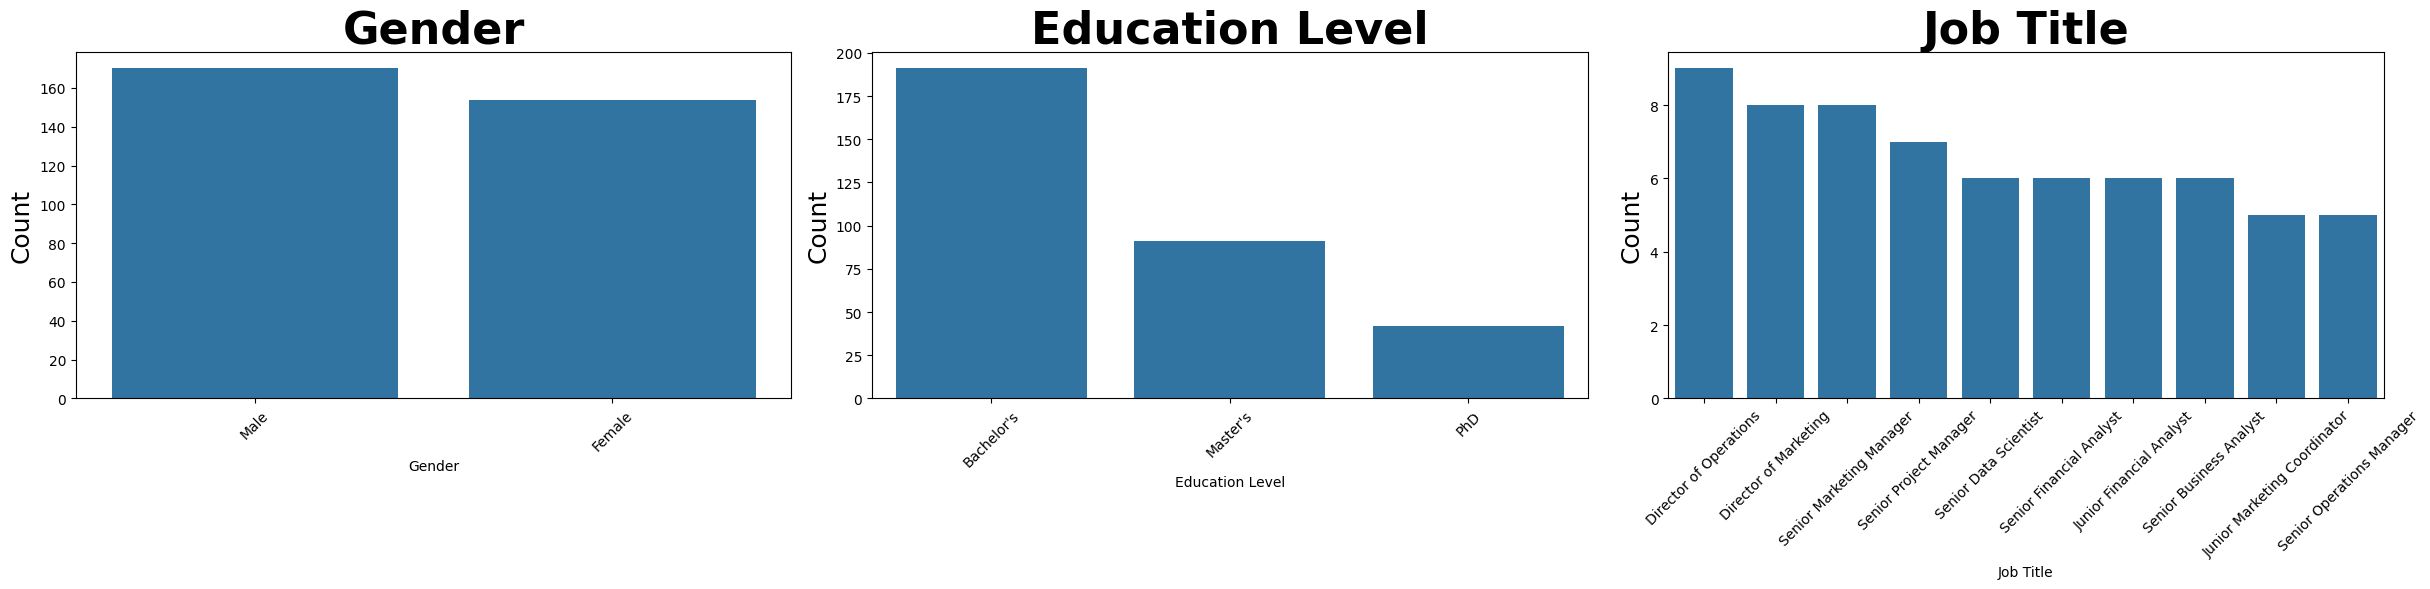

In [15]:
df_cat =['Gender', 'Education Level', 'Job Title']
n_cols = 4
n_rows = (len(df_cat) + n_cols - 1) // n_cols

fig = plt.figure(figsize=(8*n_cols, 6*n_rows))

for i, col in enumerate(df_cat):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10], ax=ax)
    ax.set_title(col, fontsize=32, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.set_ylabel('Count', fontsize=18)

plt.tight_layout()
plt.show()

Target Variable Distribution

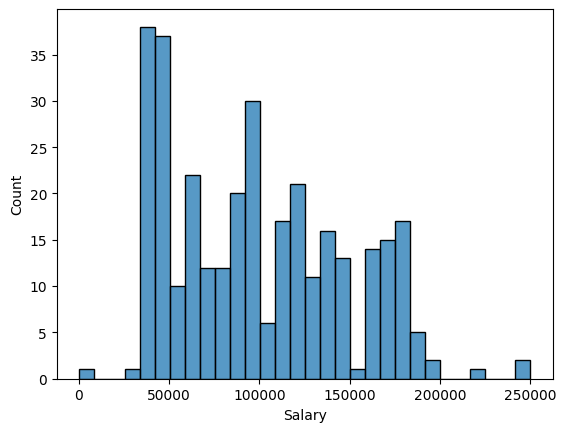

In [16]:
sns.histplot(df['Salary'], bins=30)
plt.show()

Feature Correlation

In [17]:
df_num = df._get_numeric_data()
df_corr = df_num.corr()['Salary'].drop('Salary')
df_corr

Age                    0.916543
Years of Experience    0.924455
Name: Salary, dtype: float64

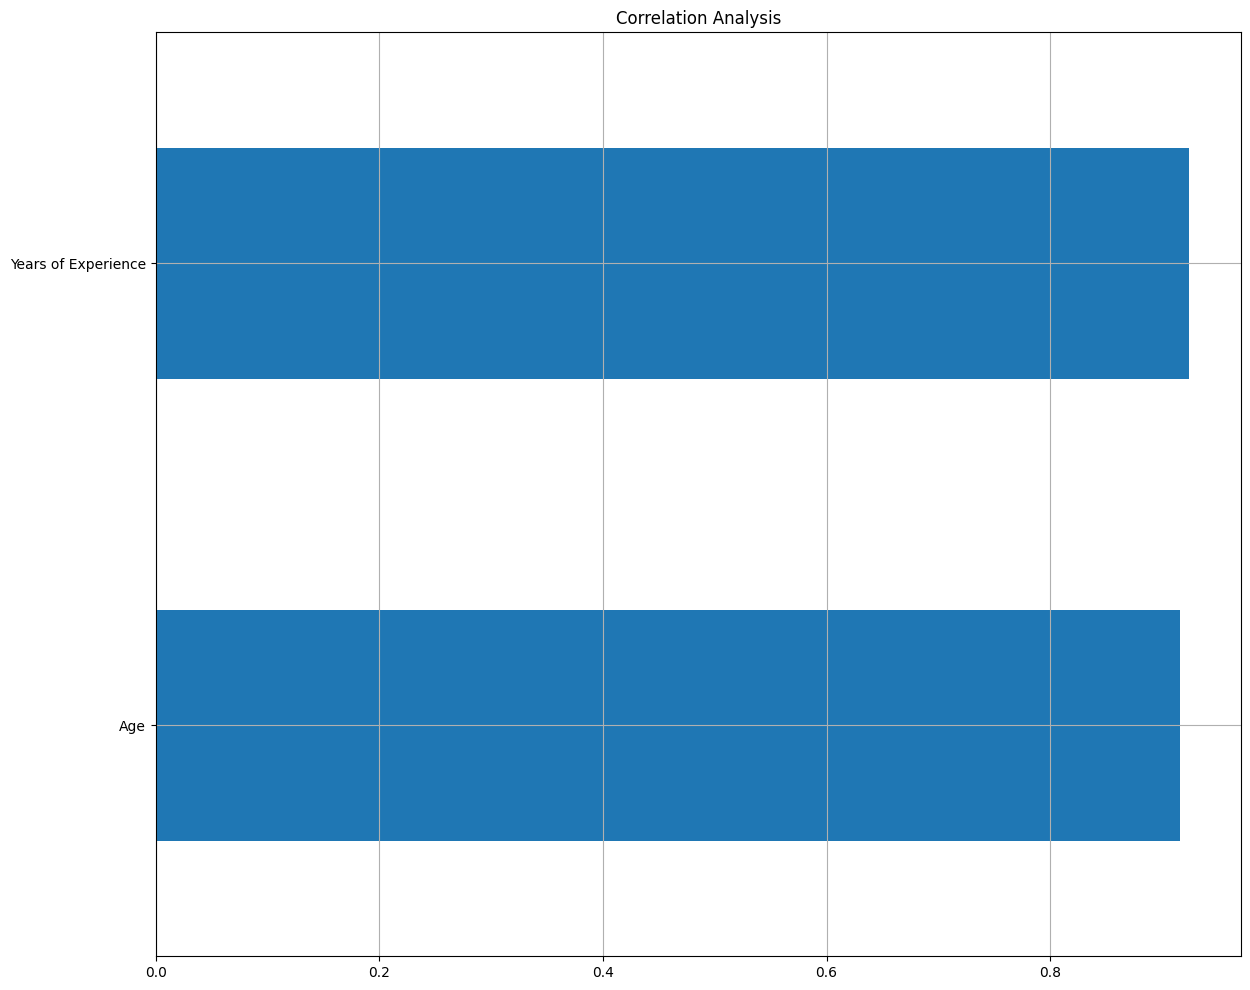

In [18]:
plt.figure(figsize=(14,12))
df_corr.plot(kind='barh', grid=True)
plt.title('Correlation Analysis')
plt.show()

In [19]:
df_corr = df[['Years of Experience', 'Age', 'Salary']]

df_corr = df_corr.corr()

Feature Correlation Heatmap

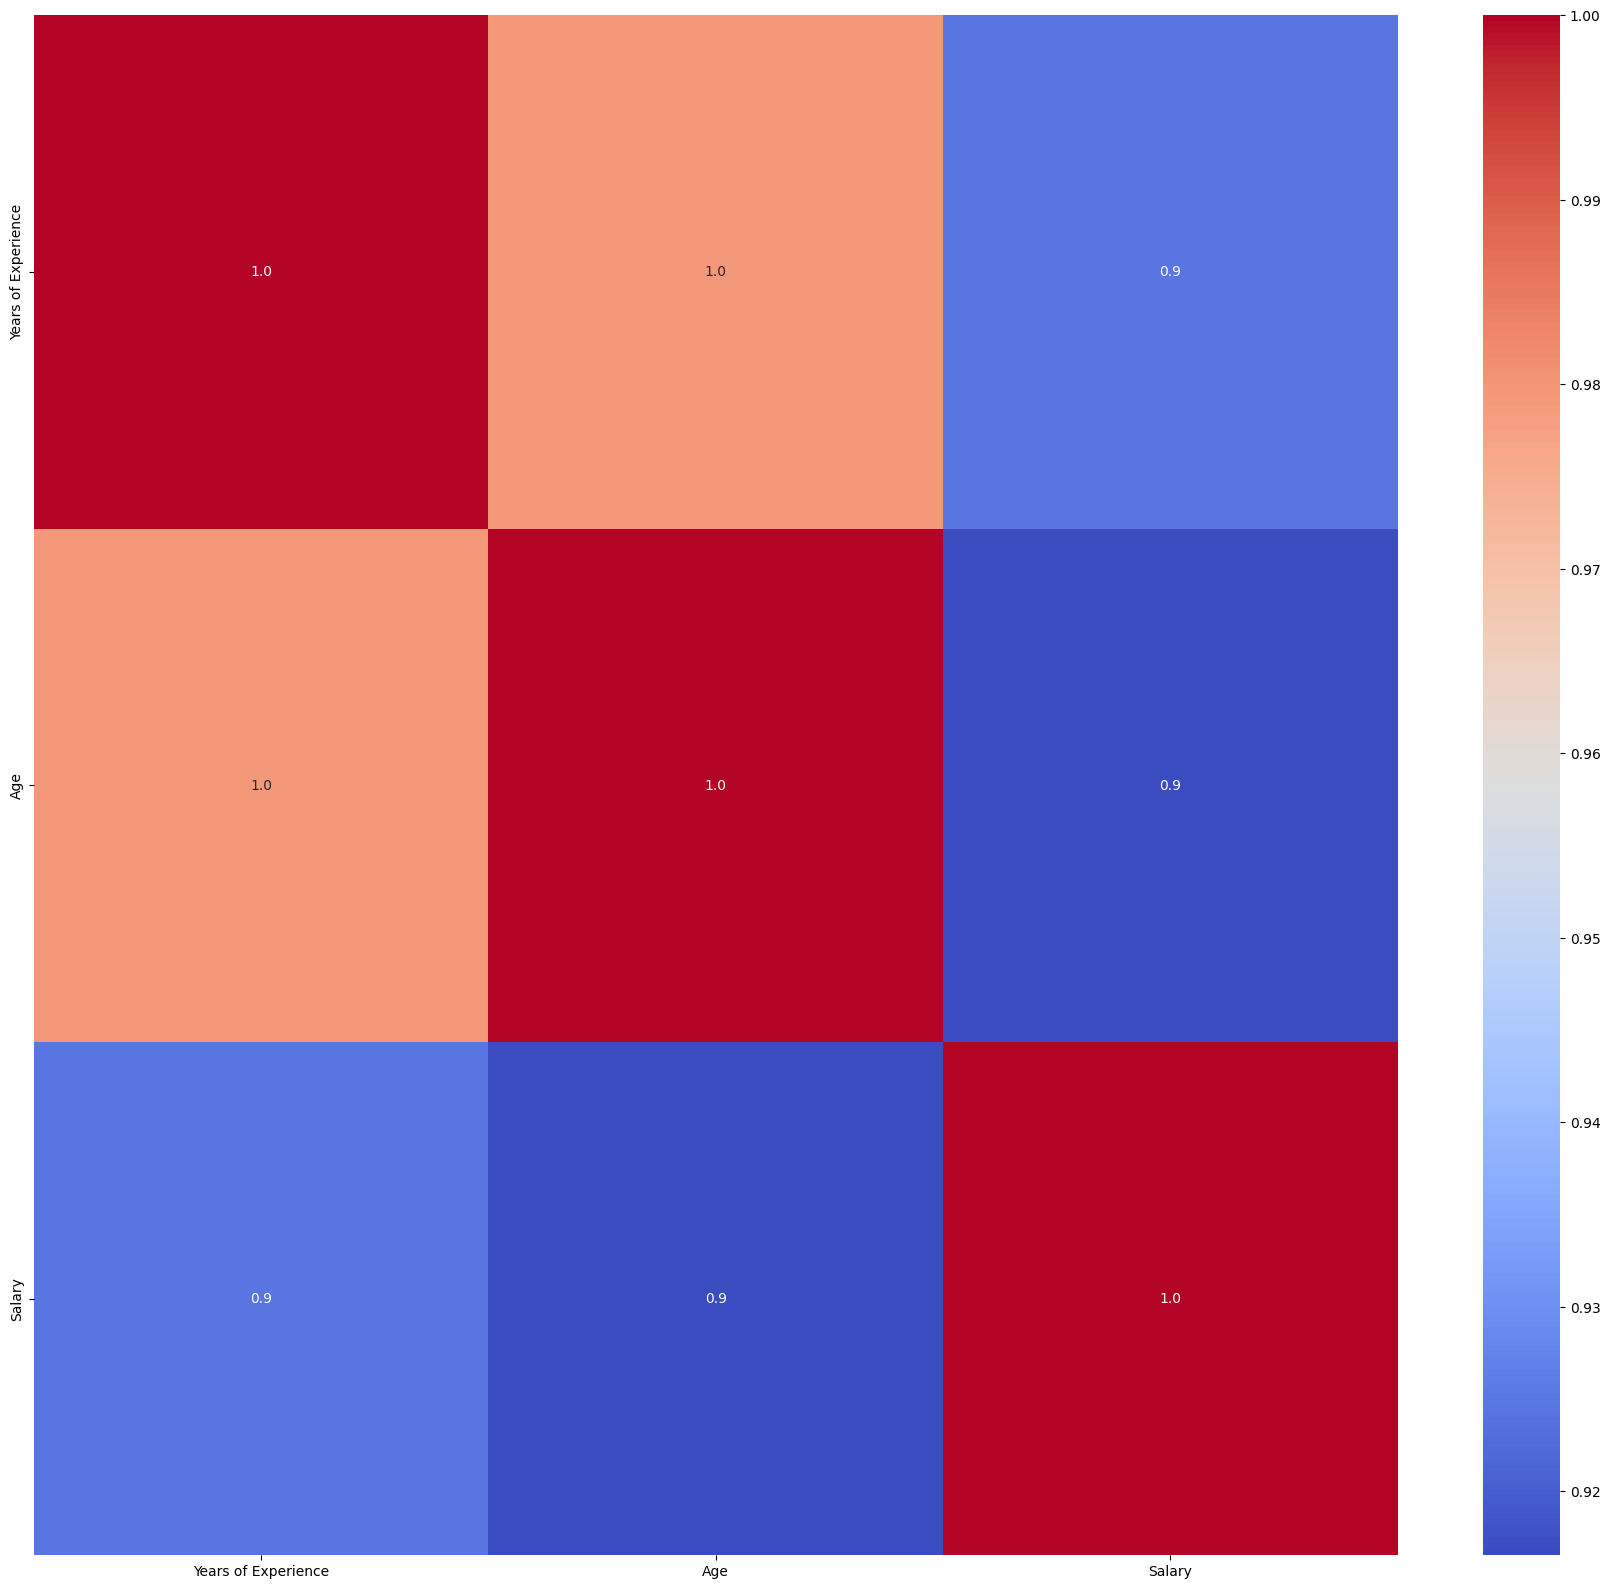

In [20]:
plt.figure(figsize=(22,20))
sns.heatmap(data=df_corr, annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

Pre-Processing

In [21]:
ecd =  LabelEncoder()
df['Job Title'] = ecd.fit_transform(df['Job Title'])
df['Education Level'] = ecd.fit_transform(df['Education Level'])
df['Gender'] = ecd.fit_transform(df['Gender'])


In [22]:
df.to_csv('Preprocessed Salary Prediction Set.csv', index=False)